# Сборный проект №1

У нас есть датафрейм `games.csv` с данными о название игр, платформе, годе выпуска, жанре игры, продажах в Северной Америке, продажах в Европе, продажах в Японии, продажах в других странах, оценке критиков, оценке пользователей, рейтинге от организации ESRB (англ. Entertainment Software Rating Board).  
Нужно выявить определяющие успешность игры закономерности. Наша задача - понять какие факторы влияют на успешность игры за актуальный период в каждом регионе (NA, EU, JP).  

**Цель исследования:** 
1. Определить потенциально прибыльные платформы.  
2. Узнать какие жанры игр наиболее интересны.  
3. Выяснить разницу между пользователями разных регионов (NA, EU, JP).

**Ход исследования:** 
- В данном проекте нам нужно сделать обзор данных.
- Удалить дубликаты и часть пропусков, заменить часть пропусков на подходящие значения.
- Добавить некоторые данные в таблицу.
- Провети исследовательский анализ.
- Составить портрет пользователя каждого региона.
- Проверить несколько гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Шаг 1. Чтение файла с данными и изучение общей информации

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Я загрузил датафрейма df c информацией об играх, их продажах и оценке.  
Столбцы названы не корректно - названия начинаются с большой буквы.  
Датафрейм состоит из 16715 строк.  
Видно, что в последних трёх столбцах достаточно много пропусков.  
В столбцах User_Score и Year_of_Release данные имеют неправильный тип данных.

## Шаг 2. Подготовка данных

### Замена названий столбцов:

In [4]:
df.columns = df.columns.str.lower()

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
df = df.dropna(subset=['year_of_release', 'name'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
df = df.reset_index(drop=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df['year_of_release'] = df['year_of_release'].astype('int')

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Типы данных были заменены в столбцах `year_of_release` и `user_score`. В `year_of_release` тип данных float заменил на int, так как год выпуска это целое число. В `user_score` тип данных заменил со строки на численный, так как оценка в данном случае численная.

In [11]:
df.duplicated().sum()

0

Строки с пропусками в столбцах `name` и `year_of_release` были удалены, так как их невозможно заполнить и они занимают 1.6% от объёма данных. Пропуски в `critic_score` и `user_score` не стал заполнять, так как в дальнейшем оценка будет браться только за определённый период и сейчас все пропуски заполнять нет смысла. В `rating` также не стал заполнять пропуски.

Часть игр ещё не вышла. Также возможно используются данные не со всех ресурсов с оценками игр.

In [12]:
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

'tbd' - это 'to be determined' (т.е. 'будет определено'). Это означает, что оценки критиков появятся в дальнейшем.  
Судя по всему все строки с данным значением в строке `user_score` были удалены. Видимо игры без указанного года релиза - это ещё не вышедшие игры. Логично, что у таких игр нет оценок.

In [14]:
implicit_dupl = df.duplicated(subset=['name', 'platform', 'year_of_release'])
drop_line = df[implicit_dupl].index[0]
drop_line

15969

In [15]:
df.drop(drop_line)

df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [16]:
df = df.reset_index(drop=True)
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16443,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Неявный дубликат был выявлен и удалён.

### Суммарные продажи во всех регионах:

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Я добавил в датафрейм столбец `total_sales`, в котором суммируются значения из столбцов `na_sales`, `eu_sales`, `jp_sales` и `other_sales`.

## Шаг 3. Проведение исследовательского анализа данных:

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

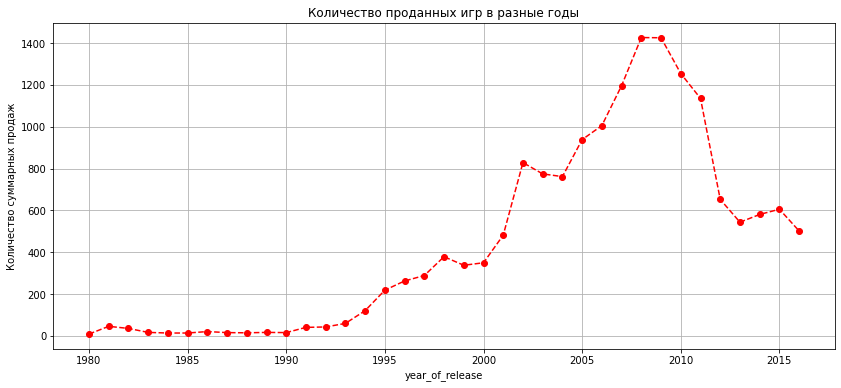

In [20]:
game_in_year = df.groupby('year_of_release')['name'].count()

plt.title('Количество проданных игр в разные годы')
plt.ylabel('Количество суммарных продаж')
game_in_year.plot( style='o--', grid=True, figsize=(14,6), color='red');

До 2009 года количество выпущенных за год игр по большей части росло, после чего начало падать. Считаю важными данные с 2013 года.

### Как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. 


In [21]:
platform_total_sales = df.groupby('platform').agg({'total_sales':'sum'})
platform_total_sales['total_sales'].sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Посчитал суммарные продажи по всем платформа.

In [22]:
successful_platform = platform_total_sales[platform_total_sales['total_sales'] > 314].index
successful_platform

Index(['DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360'], dtype='object', name='platform')

Исходя из суммарных продаж для всех платформ, выбрал те, которые посчитал успешными и удобными для построения распределения по годам.

In [23]:
df_success_platforms = df.query('platform in @successful_platform')
df_success_platforms = df_success_platforms.reset_index(drop=True)
df_success_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
9649,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
9650,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
9651,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
9652,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Выбрал только те строки, где в столбце `platform` указана одна из успешных платформ.

In [24]:
df_pivot = df_success_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot

platform,year_of_release,DS,PS,PS2,PS3,PS4,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN,NaN
5,1998,NaN,169.49,NaN,NaN,NaN,NaN,NaN
6,1999,NaN,144.53,NaN,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN,NaN
9,2002,NaN,6.67,205.38,NaN,NaN,NaN,NaN


Составил сводную таблицу, в которой указаны суммарные продажи по каждой успешной платформе в конкретный год.

Text(0.5, 0, 'Год')

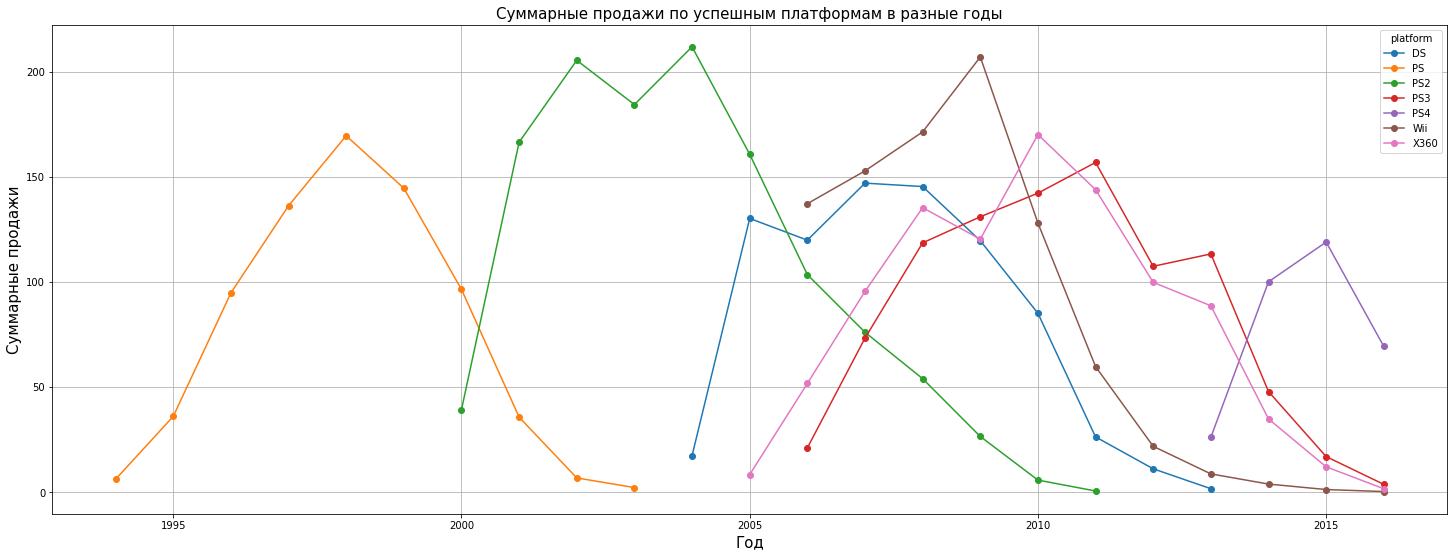

In [25]:

df_pivot.query('year_of_release >= 1994').plot(x='year_of_release', y=successful_platform, style='o-', grid=True, figsize=(25,9));
plt.title('Суммарные продажи по успешным платформам в разные годы', fontsize=15)
plt.ylabel('Суммарные продажи', fontsize=15)
plt.xlabel('Год', fontsize=15)

По графикам видно, что платформы исчезают примерно через 10 лет после появления, а новые появляются примерно каждые 5-6 лет.

### Актуальный период

In [26]:
actual_df = df.query('year_of_release >= 2013')
actual_df = actual_df.reset_index(drop=True)
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [27]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 209.5+ KB


In [28]:
actual_df['rating'] = actual_df['rating'].fillna('Nan')

Я взял данные за актуальный период (с 2013 года). Заполнил пропуски в столбце `rating` строкой 'Nan'.

### Какие платформы лидируют по продажам, растут или падают? 

In [29]:
actual_df_platform = actual_df.groupby('platform').agg({'total_sales':'sum'})
actual_df_platform['total_sales'].sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [30]:
top_platform = actual_df_platform[actual_df_platform['total_sales'] > 100].index
top_platform

Index(['3DS', 'PS3', 'PS4', 'X360', 'XOne'], dtype='object', name='platform')

За выбранный период (с 2013 года) по продажам лидируют `3DS`, `PS3`, `PS4`, `Wii`, `X360`.

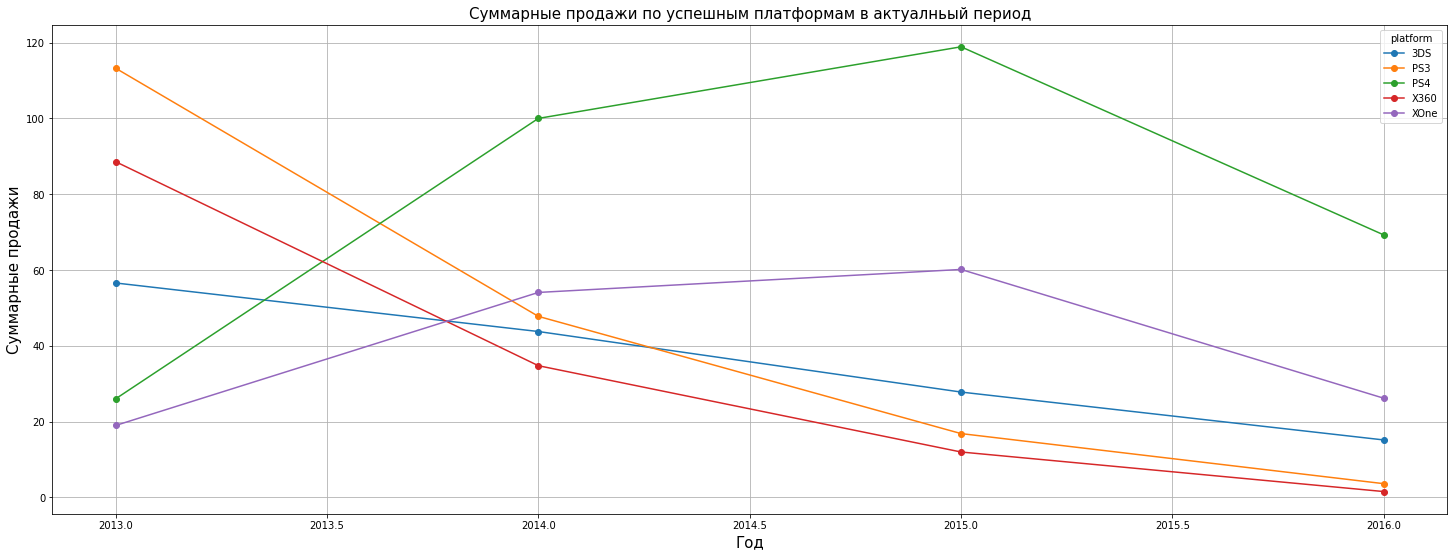

In [31]:
df_actual_pivot = actual_df.query('platform in @top_platform').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_actual_pivot = df_actual_pivot.reset_index()
df_actual_pivot.plot(x='year_of_release', y=top_platform, style='o-', grid=True, figsize=(25,9));
plt.title('Суммарные продажи по успешным платформам в актуалньый период', fontsize=15)
plt.ylabel('Суммарные продажи', fontsize=15)
plt.xlabel('Год', fontsize=15);

Продажи всех платформ к 2016 году падают. Потенциально прибыльными в 2017 году можно назвать `3DS`, `XOne`, `PS4`.

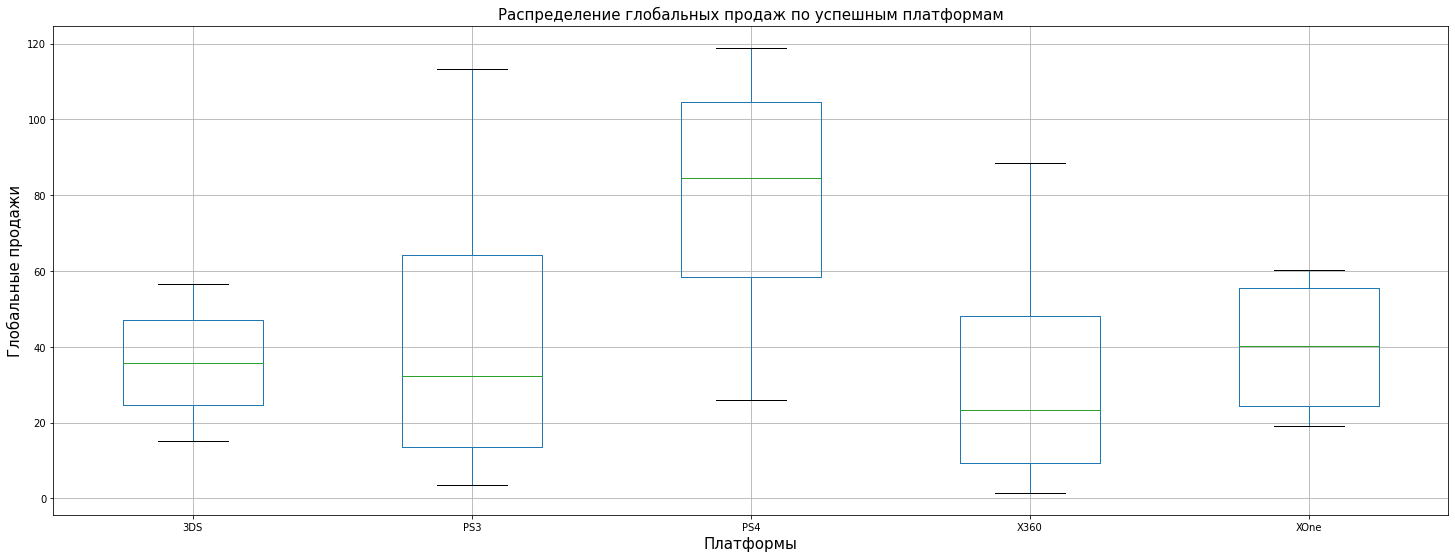

In [32]:
df_actual_pivot.plot(kind='box', y=top_platform, style='o-', grid=True, figsize=(25,9));
plt.title('Распределение глобальных продаж по успешным платформам', fontsize=15)
plt.ylabel('Глобальные продажи', fontsize=15)
plt.xlabel('Платформы', fontsize=15);

Медианы глобальных продаж почти по всем платформам лежат между 20 и 40. Сильно выбивается `PS4`, медиана которой больше 80.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

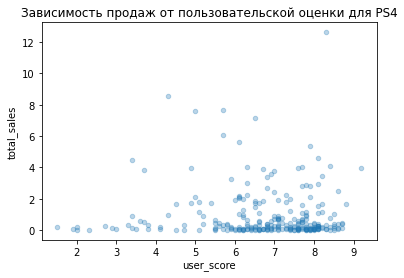

In [33]:
actual_df.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от пользовательской оценки для PS4');

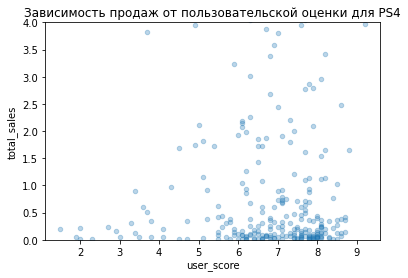

In [34]:
actual_df.query('platform == "PS4"').plot(x='user_score', y='total_sales', ylim=(-0,4), kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от пользовательской оценки для PS4');

В общем, с увеличением оценки пользователей растёт и количество игр на PS4 с более высоким значением `total_sales`.

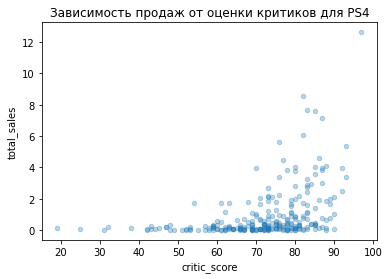

In [35]:
actual_df.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от оценки критиков для PS4');

В случае с оценками критиков зависимость более чёткая. Видно, что они не линейная, но всё-же, по большей части, чем выше оценка, тем выше сборы.

In [36]:
actual_df.query('platform == "PS4"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Судя по коэффициенту корреляции от отзывов критиков `total_sales` зависит куда больше, чем от отзывов пользователей.

### Соотнесите выводы с продажами игр на других платформах.

In [37]:
actual_df.query('platform == "XOne"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


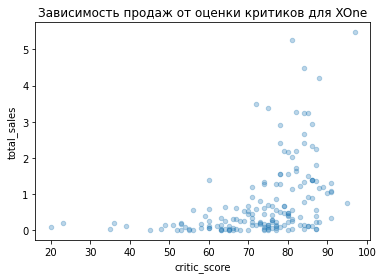

In [38]:
actual_df.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от оценки критиков для XOne');

In [39]:
actual_df.query('platform == "3DS"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.166254,0.240047,-0.090086
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.369653,0.241036,0.938867
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.268851,0.114930,0.927821
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.301810,0.259370,0.854173
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.354365,0.209418,0.945649
critic_score,0.166254,0.369653,0.268851,0.301810,0.354365,1.000000,0.769536,0.357057
user_score,0.240047,0.241036,0.114930,0.259370,0.209418,0.769536,1.000000,0.241504
total_sales,-0.090086,0.938867,0.927821,0.854173,0.945649,0.357057,0.241504,1.000000


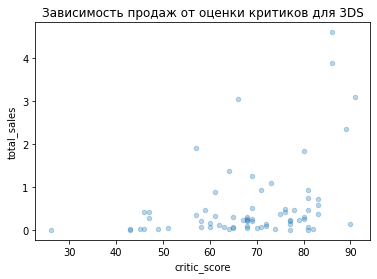

In [40]:
actual_df.query('platform == "3DS"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от оценки критиков для 3DS');

In [41]:
actual_df.query('platform == "PS3"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.217596,-0.167604,-0.195894,-0.181897,-0.167495,-0.270341,-0.201274
na_sales,-0.217596,1.000000,0.874896,0.439867,0.932098,0.335205,-0.013560,0.954921
eu_sales,-0.167604,0.874896,1.000000,0.443809,0.975743,0.309561,-0.022848,0.974740
jp_sales,-0.195894,0.439867,0.443809,1.000000,0.459609,0.302327,0.244048,0.516258
other_sales,-0.181897,0.932098,0.975743,0.459609,1.000000,0.315748,0.004633,0.989812
critic_score,-0.167495,0.335205,0.309561,0.302327,0.315748,1.000000,0.599920,0.334285
user_score,-0.270341,-0.013560,-0.022848,0.244048,0.004633,0.599920,1.000000,0.002394
total_sales,-0.201274,0.954921,0.974740,0.516258,0.989812,0.334285,0.002394,1.000000


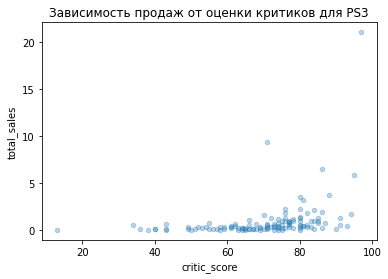

In [42]:
actual_df.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от оценки критиков для PS3');

In [43]:
actual_df.query('platform == "X360"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.218293,-0.203537,-0.285360,-0.218199,-0.245439,-0.248736,-0.220495
na_sales,-0.218293,1.000000,0.866574,0.634340,0.985236,0.342724,-0.012298,0.984299
eu_sales,-0.203537,0.866574,1.000000,0.612002,0.934769,0.336418,-0.009435,0.941008
jp_sales,-0.285360,0.634340,0.612002,1.000000,0.641529,0.290613,0.112592,0.648860
other_sales,-0.218199,0.985236,0.934769,0.641529,1.000000,0.349204,-0.018868,0.998640
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.248736,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
total_sales,-0.220495,0.984299,0.941008,0.648860,0.998640,0.350345,-0.011742,1.000000


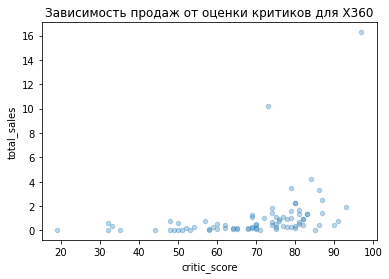

In [44]:
actual_df.query('platform == "X360"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
plt.title('Зависимость продаж от оценки критиков для X360');

По остальным платформам ситуация примерно такая же. Только на продажи для '3DS' `user_score` влияет сильнее, чем для других платформ.

### Общее распределение игр по жанрам.

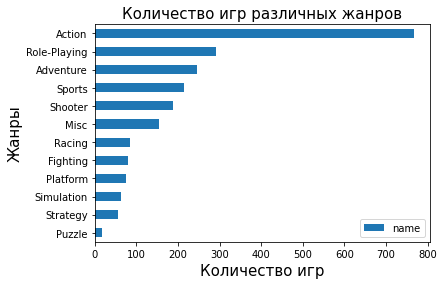

In [45]:
actual_df.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name').plot(kind='barh');
plt.title('Количество игр различных жанров', fontsize=15)
plt.ylabel('Жанры', fontsize=15)
plt.xlabel('Количество игр', fontsize=15);

Составил сводную таблицу, в которой подсчитывается количество игр для каждого жанра. И построил график.

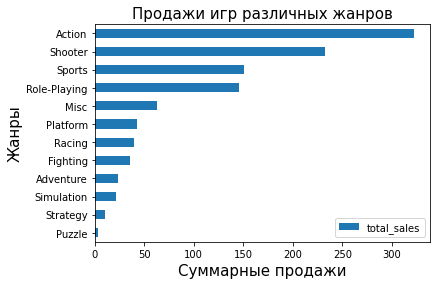

In [46]:
actual_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='barh');
plt.title('Продажи игр различных жанров', fontsize=15)
plt.ylabel('Жанры', fontsize=15)
plt.xlabel('Суммарные продажи', fontsize=15);

Всё тоже самое, но в сводной таблице считается не количество игр. А суммарная прибыль по жанрам.

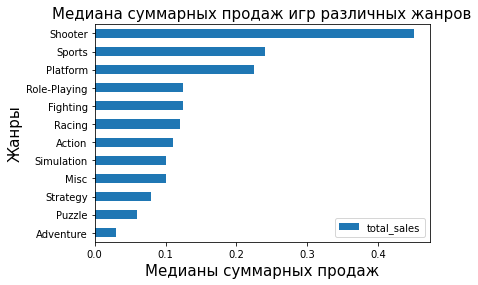

In [47]:
actual_df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales').plot(kind='barh');
plt.title('Медиана суммарных продаж игр различных жанров', fontsize=15)
plt.ylabel('Жанры', fontsize=15)
plt.xlabel('Медианы суммарных продаж', fontsize=15);

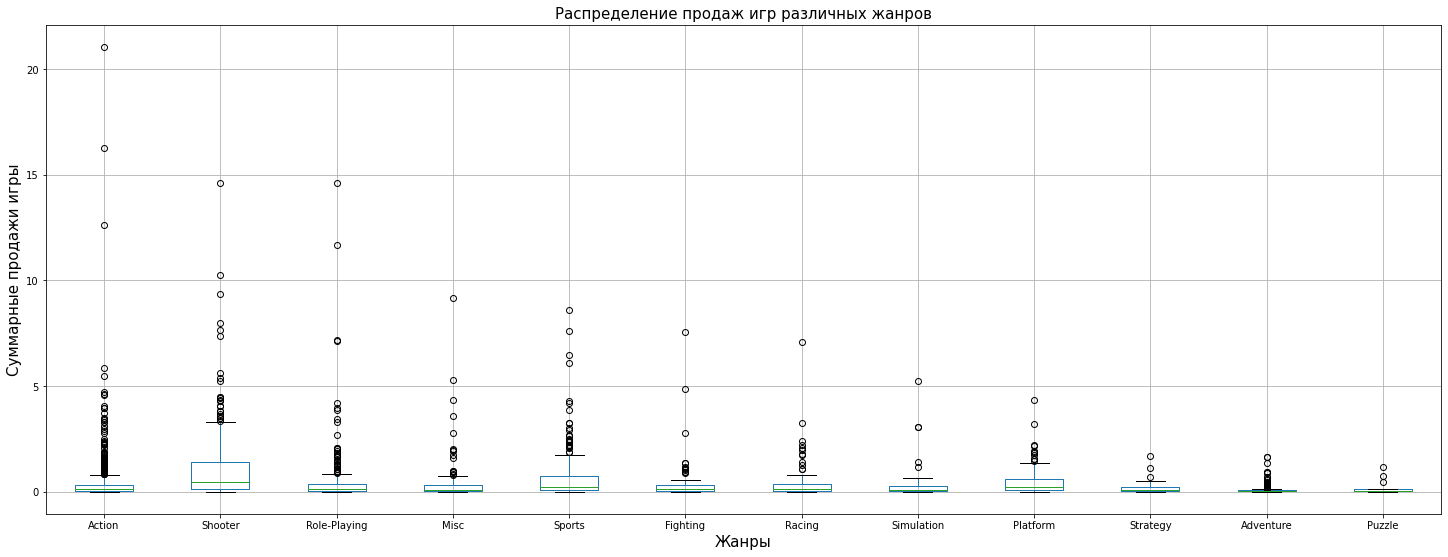

In [48]:
genre = actual_df['genre'].unique()

actual_df.pivot_table(index=actual_df.index, columns='genre', values='total_sales').plot(kind='box', y=genre, grid=True, figsize=(25,9));
plt.title('Распределение продаж игр различных жанров', fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Суммарные продажи игры', fontsize=15);

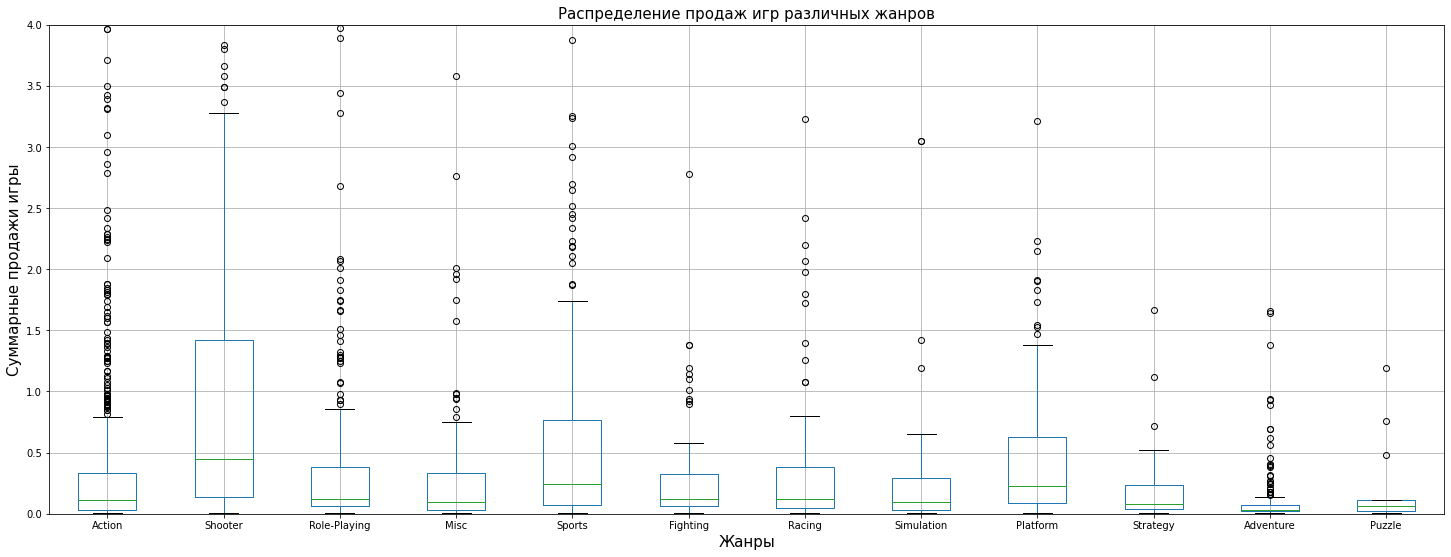

In [49]:
(
actual_df
    .pivot_table(index=actual_df.index, columns='genre', values='total_sales')
    .plot(kind='box', ylim=(0,4), y=genre, grid=True, figsize=(25,9))
);
plt.title('Распределение продаж игр различных жанров', fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Суммарные продажи игры', fontsize=15);

Смотря на график с медианами продаж по каждому жанру, видим иную картину, нежели для суммы. Жанр Action, лидирующий по суммарным продажам всех игр, находится ниже середины списка для медиан.

## Шаг 4. Портрет пользователя каждого региона

### Определение для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). 

In [50]:
platrform_na = actual_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
platrform_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


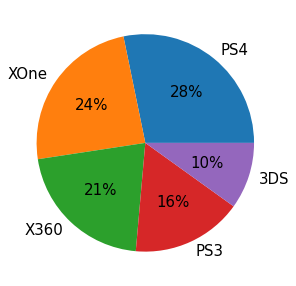

In [51]:
data_na = platrform_na['na_sales'].values

labels_na = platrform_na.index

plt.rcParams['font.size'] = '15'

plt.figure(figsize=(5,5))
plt.pie(data_na, labels=labels_na, autopct='%.0f%%')
plt.show()

In [52]:
platrform_eu = actual_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
platrform_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


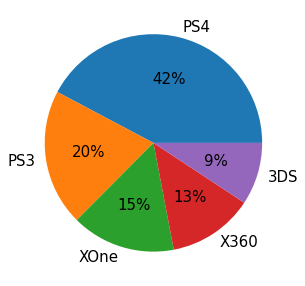

In [53]:
data_eu = platrform_eu['eu_sales'].values

labels_eu = platrform_eu.index

plt.rcParams['font.size'] = '15'

plt.figure(figsize=(5,5))
plt.pie(data_eu, labels=labels_eu, autopct='%.0f%%')
plt.show()

In [54]:
platrform_jp = actual_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
platrform_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


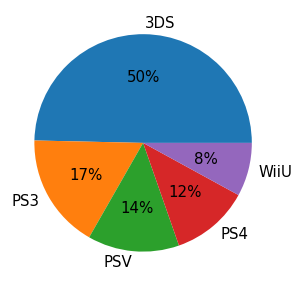

In [55]:
data_jp = platrform_jp['jp_sales'].values

labels_jp = platrform_jp.index

plt.rcParams['font.size'] = '15'

plt.figure(figsize=(5,5))
plt.pie(data_jp, labels=labels_jp, autopct='%.0f%%')
plt.show()

В EU и NA популярны одни и те же платформы, разница в долях (в EU 'PS4' имеет куда большую долю, чем в NA). В JP популярны другие платформы.

#### Самые популярные жанры (топ-5). 

In [56]:
genre_na = actual_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


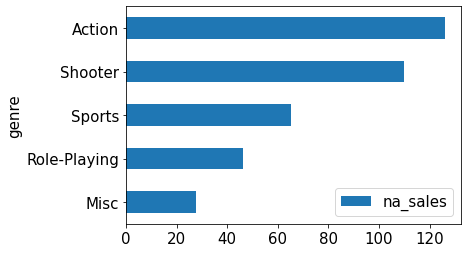

In [57]:
genre_na.sort_values(by='na_sales', ascending=True).plot(kind='barh');

In [58]:
genre_eu = actual_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


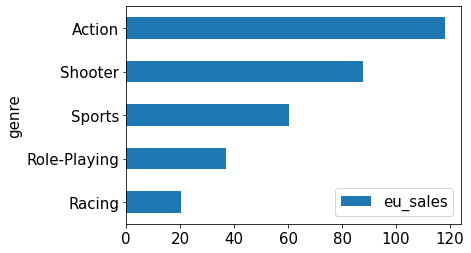

In [59]:
genre_eu.sort_values(by='eu_sales', ascending=True).plot(kind='barh');

In [60]:
genre_jp = actual_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


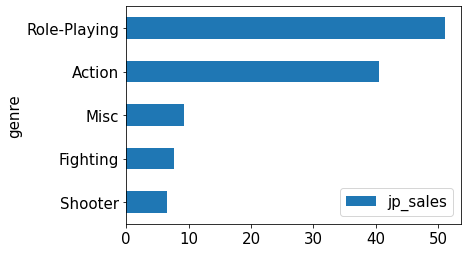

In [61]:
genre_jp.sort_values(by='jp_sales', ascending=True).plot(kind='barh');

Для NA и EU топы отличаются только пятым жанром. Топ для JP похож на NA, с разницей в одном жанре и последовательности.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [62]:
rating_jp = actual_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales')
rating_jp

,jp_sales
rating,
E10+,5.89
M,14.11
E,15.14
T,20.59
Nan,85.05


<AxesSubplot:ylabel='rating'>

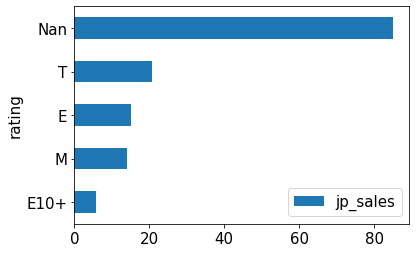

In [63]:
rating_jp.sort_values(by='jp_sales', ascending=True).plot(kind='barh')

В столбце `rating` много пропусков. Но по тем строкам, где пропусков в данном столбце нет, можно сделать вывод, что от рейтинга ESRB продажи всё-таки зависят.

## Шаг 5. Проверка гипотезы.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

In [64]:
actual_df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating                0
total_sales           0
dtype: int64

In [65]:
actual_df_user = actual_df.dropna(subset=['user_score'])
actual_df_user.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       216
user_score           0
rating               0
total_sales          0
dtype: int64

Из `actual_df` я удалил строки, в которых имелись пропуски в столбце `user_score`.

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [66]:
sample_xone = actual_df_user.query('platform == "XOne"')['user_score']

sample_pc = actual_df_user.query('platform == "PC"')['user_score']

alpha = 0.05 

results = st.ttest_ind(sample_xone, sample_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


По результатам теста есть основания считать, что средние пользовательские рейтинги платформ 'Xbox One' и 'PC' одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

H0 - Средние пользовательские рейтинги жанров Action и жанров Sports одинаковые  
H1 - Средние пользовательские рейтинги жанров Action и жанров Sports не одинаковые

In [67]:
sample_action = actual_df_user.query('genre == "Action"')['user_score']

sample_sports = actual_df_user.query('genre == "Sports"')['user_score']

alpha = 0.05 

results = st.ttest_ind(sample_action, sample_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


По результатам теста есть основания считать, что средние пользовательские рейтинги жанров 'Action' и 'Sports' разные.

Так как требовалось проверить гипотезы о равенстве и неравенстве, следовательно нулевой гипотезой была гипотеза о равенстве, а альтернативной - о неравенстве.  

## Шаг 6. Общий вывод

Типы данных были заменены в столбцах year_of_release и user_score. 
В year_of_release тип данных float заменили на int, так как год выпуска это целое число.  
В user_score тип данных заменили со строки на численный, так как оценка в данном случае численная.  
  
Строки с пропусками в столбцах name и year_of_release были удалены, так как их невозможно заполнить и они занимают 1.6% от объёма данных.  
Пропуски в critic_score и user_score не стал заполнять, так как в дальнейшем оценка будет браться только за определённый период и сейчас все пропуски заполнять нет смысла. В rating также не стал заполнять пропуски.  
  
Я добавил в датафрейм столбец total_sales, в котором суммируются значения из столбцов na_sales, eu_sales, jp_sales и other_sales.  
  
До 2009 года количество выпущенных за год игр по большей части росло, после чего начало падать. Считаю важными данные с 2013 года.  
  
Исходя из суммарных продаж для всех платформ, выбрал те, которые посчитал успешными и удобными для построения распределения по годам.  
  
По графикам видно, что платформы исчезают примерно через 10 лет после появления, а новые появляются примерно каждые 5-6 лет.  
  
Я взял данные за актуальный период (с 2013 года). Заполнил пропуски в столбце rating строкой 'Nan'.  
За выбранный период (с 2013 года) по продажам лидируют 3DS, PS3, PS4, Wii, X360.  
Продажи всех платформ к 2016 году падают. Потенциально прибыльными в 2017 году можно назвать 3DS, XOne, PS4.   
  
Медианы глобальных продаж почти по всем платформам лежат между 20 и 40. Сильно выбивается PS4, медиана которой больше 80.  
В общем, с увеличением оценки пользователей растёт и количество игр на PS4 с более высоким значением total_sales. 
В случае с оценками критиков зависимость более чёткая. Видно, что они не линейная, но всё-же, по большей части, чем выше оценка, тем выше сборы.  
  
Наибольшее значение медианы суммарных продаж игр имеет жанр 'Shooter'
    
Судя по коэффициенту корреляции от отзывов критиков total_sales зависит куда больше, чем от отзывов пользователей.  
По остальным платформам ситуация примерно такая же. Только на продажи для '3DS' user_score влияет сильнее, чем для других платформ.  
  
Судя по сводным таблицам и круговым диаграммам в EU и NA популярны одни и те же платформы, разница в долях (в EU 'PS4' имеет куда большую долю, чем в NA). В JP популярны другие платформы.  
  
Для NA и EU топы отличаются только пятым жанром. Топ для JP похож на NA, с разницей в одном жанре и последовательности.  
В столбце rating много пропусков. Но по тем строкам, где пропусков в данном столбце нет, можно сделать вывод, что от рейтинга ESRB продажи всё-таки зависят.  
  
По результатам теста есть основания считать, что средние пользовательские рейтинги платформ 'Xbox One' и 'PC' одинаковые.  
По результатам теста есть основания считать, что средние пользовательские рейтинги жанров 'Action' и 'Sports' разные.  
Так как требовалось проверить гипотезы о равенстве и неравенстве, следовательно нулевой гипотезой была гипотеза о равенстве, а альтернативной - о неравенстве.

**Рекомендации:** 
1. В 2017 году потенциально наиболее успешные платформы - '3DS', 'PS4' и 'XOne
2. На продажи игры больше влияет оценка критиков
3. Наиболее прибыльные игры - игры в жанре 'Shooter' и 'Platform' 
4. 
- В NA наибольшую популярность имеют 'PS4' и 'XOne'
- В EU - 'PS4'
- В JP - '3DS'
5. В JP наиболее популярны игры с рейтингом 